# Regression linéaire simple

In [54]:
import pandas as pa
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Exemples (de cours)

### Exemple 1.

In [55]:
data = {'nb_employes': [356, 67, 25, 157, 589, 557, 78],
       'taux_absenteisme': [5, 3, 2, 4, 7, 3, 8]}

In [143]:
# On vérifie ses les deux variables sont corrélées (corrcoef de numpy)
X = data['nb_employes']
y = data['taux_absenteisme']

np.corrcoef(X, y)

array([[1.        , 0.22460461],
       [0.22460461, 1.        ]])

### Exemple 2.

In [99]:
data2 = {'depenses': [8900, 9400, 14500, 25400, 26600],
        'revenus': [21000, 2500, 30000, 45000, 50000]}

In [144]:
# Les variables sont -corréllées ?
X = data2['revenus']
y = data2['depenses']
np.corrcoef(X, y)

array([[1.        , 0.91759971],
       [0.91759971, 1.        ]])

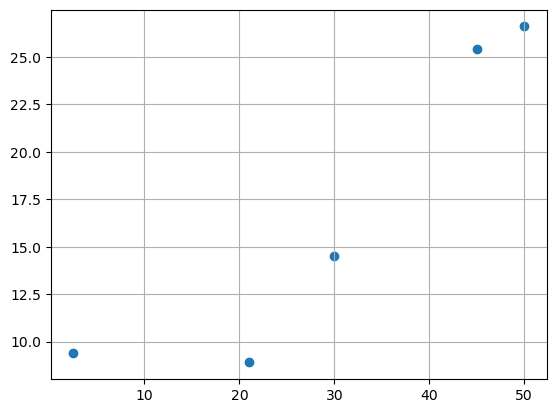

In [145]:
# On affiche le nuage de points
plt.grid()
plt.scatter(X, y)

#### A la recherche de la meilleure droite de régression 

##### Par la descente de gradient

Nous allons utiliser un corpus généré aléatoirement

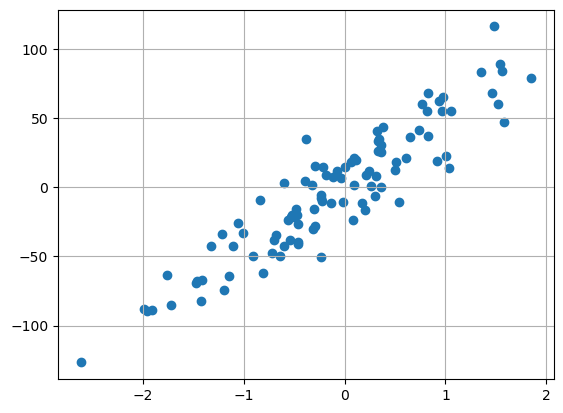

In [149]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
plt.grid()
plt.scatter(X, y)

In [151]:
def gradientS(b0, b1, x, y):
    m = len(x)  
    t0 = [b0 + b1 * x[i] - y[i] for i in range(m)]
    t1 = [x[i] * (b0 + b1 * x[i] - y[i]) for i in range(m)]
    db0 = np.sum(t0)#theta0 + theta1 * x - y)
    db1 = np.sum(t1)#x * (theta0 + theta1*x - y))
    
    db0 = 2 * db0 / m
    db1 = 2 * db1 / m
    return db0, db1

In [152]:
b0, b1 = 40, 1
epsilon = 0.1
eta = .1 # 0.0000005

db0, db1 = gradientS(b0, b1, X, y)

dist = norm([db0,db1]) 
  
while(dist > epsilon):
   
    b0, b1 = b0 - eta * db0, b1 - eta * db1
    
    db0, db1 = gradientS(b0, b1 , X, y)
    
    dist = norm([db0,db1])

print(b0, b1)

2.3156812113331555 47.075820897106205


In [153]:
y_hat = b0 + b1 * X

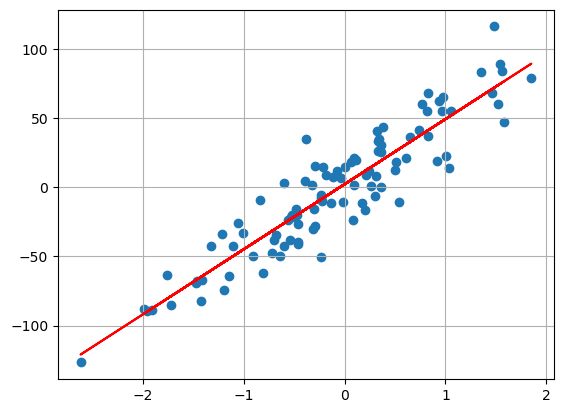

In [154]:
plt.grid()
plt.scatter(X, y)
plt.plot(X, y_hat, c='red')

##### Par calcul direct

In [155]:
x_bar = np.mean(X)
y_bar = np.mean(y)
m = len(X)
t1 = [(X[i] - x_bar)*(y[i] - y_bar) for i in range(m)]
t2 = [(X[i] - x_bar)**2 for i in range(m)] 
b1 = np.sum(t1)/np.sum(t2)
b0 = y_bar - b1 * x_bar

print(b0, b1)
y_hat_bis = b0 + b1 * X

2.330230641053947 47.13323966963206


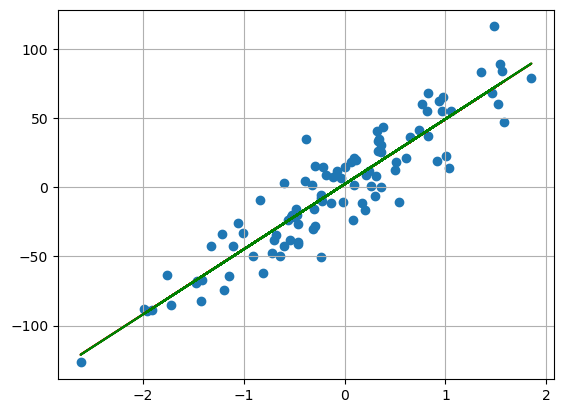

In [156]:
plt.grid()
plt.scatter(X, y)
plt.plot(X, y_hat, c='red')
plt.plot(X, y_hat_bis, c='green')


In [150]:
def gradientS(b0, b1, X, y):
    m = len(X)
    t0 = [b0 + b1 * X[i] - y[i] for i in range(m)]
    t1 = [(b0 + b1 * X[i] - y[i]) * x[i] for i in range(m)]
    db0 = 2 * np.sum(t0) / m
    db1 = 2 * np.sum(t1) / m
    return db0, db1

In [ ]:
beta1 = np.sum((X - np.mean(X)*(y - np.mean(y)) / np.sum((X - np.mean(X)**2)
beta0 = np.mean(y) - beta1 * np.mean(X)